   age           job   marital            education housing loan    contact  \
0   41   blue-collar  divorced             basic.4y     yes   no  telephone   
1   49  entrepreneur   married    university.degree     yes   no  telephone   
2   49    technician   married             basic.9y      no   no  telephone   
3   41    technician   married  professional.course     yes   no  telephone   
4   45   blue-collar   married             basic.9y     yes   no  telephone   

  month day_of_week  duration  campaign  pdays     poutcome  nr.employed  \
0   may         mon      1575         1    999  nonexistent       5191.0   
1   may         mon      1042         1    999  nonexistent       5191.0   
2   may         mon      1467         1    999  nonexistent       5191.0   
3   may         mon       579         1    999  nonexistent       5191.0   
4   may         mon       461         1    999  nonexistent       5191.0   

  subscribed  
0        yes  
1        yes  
2        yes  
3       

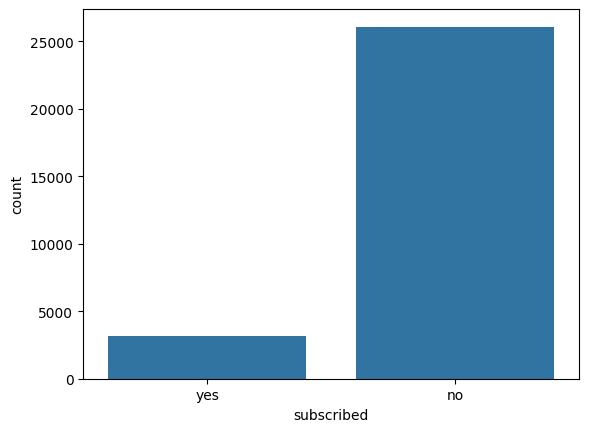

job:
 job
admin.           7313
blue-collar      6697
technician       5094
services         2833
management       2112
entrepreneur     1109
self-employed    1036
retired           946
housemaid         853
unemployed        705
student           313
unknown           260
Name: count, dtype: int64
marital:
 marital
married     18387
single       7469
divorced     3364
unknown        51
Name: count, dtype: int64
education:
 education
university.degree      8562
high.school            6563
basic.9y               4314
professional.course    3831
basic.4y               3070
basic.6y               1689
unknown                1227
illiterate               15
Name: count, dtype: int64
housing:
 housing
yes        14863
no         13695
unknown      713
Name: count, dtype: int64
loan:
 loan
no         24149
yes         4409
unknown      713
Name: count, dtype: int64
contact:
 contact
cellular     15499
telephone    13772
Name: count, dtype: int64
poutcome:
 poutcome
nonexistent    28015
failu

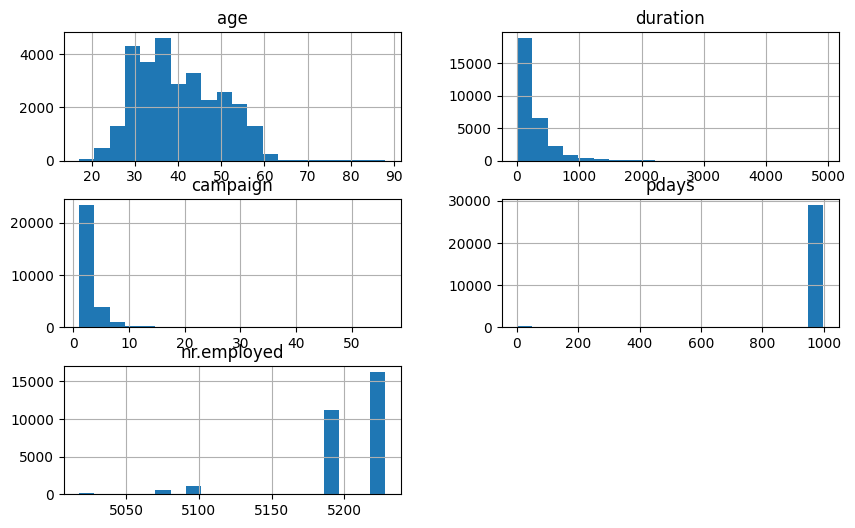

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train = pd.read_csv('trainset.csv')
test = pd.read_csv('testset.csv')

# Rename target column to lowercase for consistency
train.rename(columns={'Subscribed':'subscribed'}, inplace=True)
test.rename(columns={'Subscribed':'subscribed'}, inplace=True)

# Quick look
print(train.head())
print(train.info())

# Target distribution
print(train['subscribed'].value_counts())
sns.countplot(x='subscribed', data=train)
plt.show()

# Explore categorical features
for col in ['job','marital','education','housing','loan','contact','poutcome']:
    print(f"{col}:\n", train[col].value_counts())

# Explore numeric features
train[['age','duration','campaign','pdays','nr.employed']].hist(bins=20, figsize=(10,6))
plt.show()




In [ ]:
# Step 0: Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Load data
train = pd.read_csv('trainset.csv')
test = pd.read_csv('testset.csv')

# Step 2: Clean column names
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# Step 3: Fix target column
# Map 'Subscribed' to 0/1
train['subscribed'] = train['Subscribed'].map({'no':0, 'yes':1})
test['subscribed'] = test['Subscribed'].map({'no':0, 'yes':1})

# Step 4: Clean categorical features
categorical_cols = ['job','marital','education','housing','loan','contact','poutcome','month','day_of_week']

# Replace 'unknown' with mode
for col in categorical_cols:
    train[col] = train[col].replace('unknown', train[col].mode()[0])
    test[col] = test[col].replace('unknown', test[col].mode()[0])

# Encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# Step 5: Separate features and target
X_train = train.drop(['Subscribed','subscribed'], axis=1)
y_train = train['subscribed']

X_test = test.drop(['Subscribed','subscribed'], axis=1)
y_test = test['subscribed']

# Step 6: Quick checks
print("Target distribution (train):")
print(y_train.value_counts())
print("\nFeatures preview:")
print(X_train.head())




Target distribution (train):
subscribed
0    26075
1     3196
Name: count, dtype: int64

Features preview:
   age  job  marital  education  housing  loan  contact  month  day_of_week  \
0   41    1        0          0        1     0        1      6            1   
1   49    2        1          6        1     0        1      6            1   
2   49    9        1          2        0     0        1      6            1   
3   41    9        1          5        1     0        1      6            1   
4   45    1        1          2        1     0        1      6            1   

   duration  campaign  pdays  poutcome  nr.employed  
0      1575         1    999         1       5191.0  
1      1042         1    999         1       5191.0  
2      1467         1    999         1       5191.0  
3       579         1    999         1       5191.0  
4       461         1    999         1       5191.0  


Original target distribution:
subscribed
no     26075
yes     3196
Name: count, dtype: int64

Mapped target distribution:
subscribed
0    26075
1     3196
Name: count, dtype: int64

Categorical columns: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Training class distribution:
subscribed
0    20859
1     2557
Name: count, dtype: int64

Test class distribution:
subscribed
0    5216
1     639
Name: count, dtype: int64

DECISION TREE RESULTS
Accuracy: 0.9303

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5216
           1       0.62      0.95      0.75       639

    accuracy                           0.93      5855
   macro avg       0.81      0.94      0.85      5855
weighted avg       0.95      0.93      0.94      5855



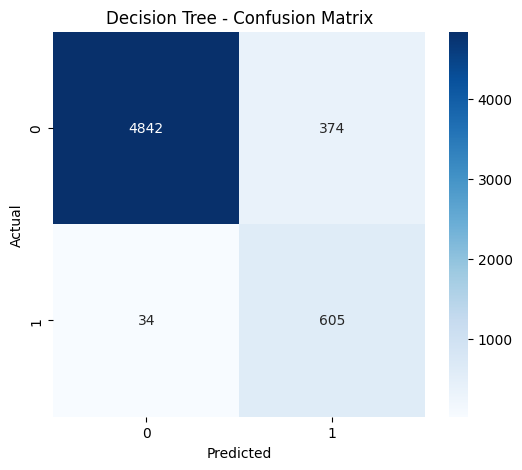


LOGISTIC REGRESSION RESULTS
Accuracy: 0.9450

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      5216
           1       0.69      0.91      0.78       639

    accuracy                           0.95      5855
   macro avg       0.84      0.93      0.88      5855
weighted avg       0.96      0.95      0.95      5855



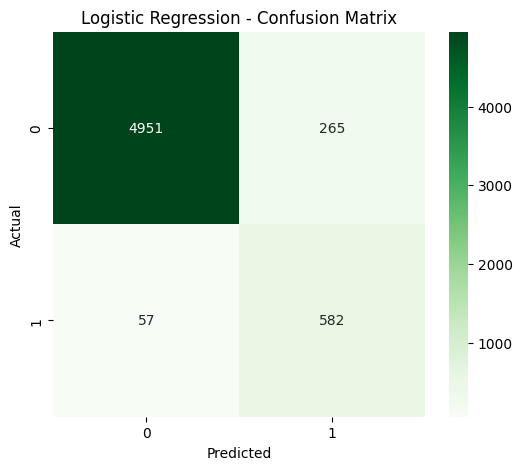

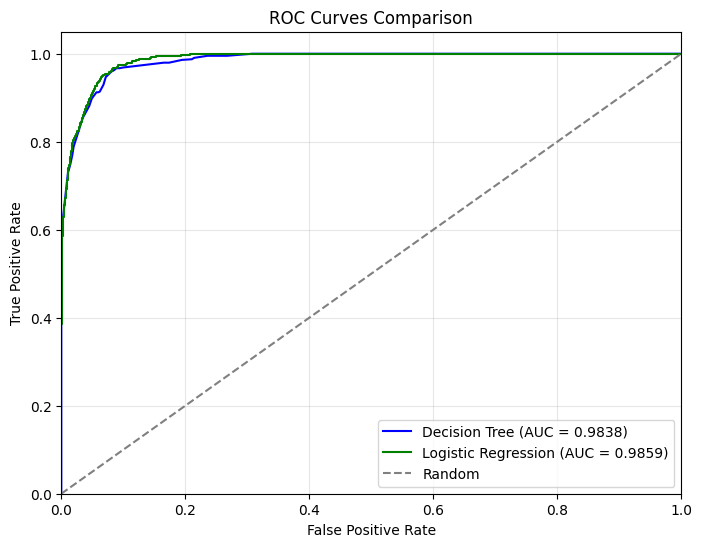


MODEL COMPARISON SUMMARY
Decision Tree AUC: 0.9838
Logistic Regression AUC: 0.9859


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# 1. LOAD FRESH DATA
# This ignores all previous 'train' variables and starts clean
df = pd.read_csv('trainset.csv')

# Make sure column names are clean
df.columns = df.columns.str.strip()

# Target column is 'Subscribed' in the CSV -> rename to 'subscribed'
df.rename(columns={'Subscribed': 'subscribed'}, inplace=True)

# Check target values
print("Original target distribution:")
print(df['subscribed'].value_counts())

# Map target to 0/1 (no=0, yes=1)
df['subscribed'] = df['subscribed'].map({'no': 0, 'yes': 1})

print("\nMapped target distribution:")
print(df['subscribed'].value_counts())

# 2. SEPARATE FEATURES AND TARGET
y = df['subscribed']
X = df.drop('subscribed', axis=1)

#  3. ENCODE CATEGORICAL FEATURES
cat_cols = X.select_dtypes(include=['object']).columns
print("\nCategorical columns:", list(cat_cols))

# One-hot encode categorical features
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Fill any remaining missing values just in case
X = X.fillna(0)

# 4. TRAIN / TEST SPLIT (STRATIFIED)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTraining class distribution:")
print(y_train.value_counts())
print("\nTest class distribution:")
print(y_test.value_counts())

# 5. DECISION TREE MODEL
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=50,
    class_weight='balanced',
    random_state=42
)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # prob of class 1

print("\n" + "="*60)
print("DECISION TREE RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 6. LOGISTIC REGRESSION MODEL
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(
    max_iter=5000,
    class_weight='balanced',
    random_state=42
)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("\n" + "="*60)
print("LOGISTIC REGRESSION RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 7. ROC CURVES
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})', color='blue')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})', color='green')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(f"Decision Tree AUC: {roc_auc_dt:.4f}")
print(f"Logistic Regression AUC: {roc_auc_lr:.4f}")



